# Traitement des données pour l'intelligence artificielle et la santé
**Author:** [LudovicSaintBauzel](https://www.isir.upmc.fr/personnel/saintbauzel/)<br>
**Date created:** 2023/06/01<br>
**Last modified:** 2023/06/06<br>
**Description:** Atelier sur l'apprentissage et le traitement des données pour le "summer school" Intelligence Artificielle et santé.

<a href="https://colab.research.google.com/github/LudovicSaintBauzel/AI4Health/blob/main/SummerSchool2023_IA_Sante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initialisation des librairies pour le travail.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
import os
import glob
import math

# Chargement des données

In [2]:
!curl -O https://nuage.isir.upmc.fr/index.php/s/ZiPJ3RFGFaF3HBs/download/records.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 18.9M  100 18.9M    0     0  3363k      0  0:00:05  0:00:05 --:--:-- 3847k


# Analyse et travail sur les données

In [3]:
!unzip -o records.zip
!ls 

Archive:  records.zip
   creating: records/
   creating: records/move/
  inflating: records/.DS_Store       
  inflating: __MACOSX/records/._.DS_Store  
   creating: records/MA/
   creating: records/test/
   creating: records/OL/
   creating: records/fx/
   creating: records/BO2504/
   creating: records/fuzzy/
   creating: records/test1/
   creating: records/traj/
   creating: records/MMESA/
   creating: records/MMECA/
   creating: records/test2/
  inflating: records/DESCRIPTIONS_DONNEES.txt  
  inflating: __MACOSX/records/._DESCRIPTIONS_DONNEES.txt  
   creating: records/LE1804/
   creating: records/move/do1/
   creating: records/move/test/
   creating: records/move/do/
   creating: records/move/test_ludo4/
   creating: records/move/test_ludo3/
   creating: records/move/test_ludo2/
 extracting: records/move/testen.txt  
   creating: records/move/test_ludo5/
   creating: records/move/test1/
   creating: records/move/marc/
  inflating: records/move/follow_traj.txt  
  inflating: records

## Observons l'organisation des données

Maintenant que les données sont téléchargées, il est possible de connaître l'organisation des données en ouvrant le fichier (/content/records/DESCRIPTIONS_DONNEES.txt). On note que le fichier follow_traj.txt contient toutes les informations utiles pour la classification que nous souhaitons effectuer. 


In [51]:
os.chdir('/Users/ludo/Documents/src/AI4Health')

# Liste des noms de fichiers CSV
fichiers_csv = [[file for file in glob.glob("*/*/*/follow_traj.txt")]]

In [52]:
donnees = []

# Charger chaque fichier CSV et ajouter les données à la liste
for fichier_csv in fichiers_csv[0]:
    print(fichier_csv)
    data = pd.read_csv(fichier_csv, sep='\s+', header=None)
    donnees.append(data)


records/move/test_ludo4/follow_traj.txt
records/move/test_ludo8/follow_traj.txt
records/MA/move6/follow_traj.txt
records/MA/fx9/follow_traj.txt
records/MA/fx7/follow_traj.txt
records/MA/move7/follow_traj.txt
records/MA/fx6/follow_traj.txt
records/MA/fx1/follow_traj.txt
records/MA/fx8/follow_traj.txt
records/MA/traj3/follow_traj.txt
records/MA/traj4/follow_traj.txt
records/MA/traj5/follow_traj.txt
records/MA/traj2/follow_traj.txt
records/MA/fuz2/follow_traj.txt
records/MA/fuz4/follow_traj.txt
records/MA/fuz3/follow_traj.txt
records/MA/fx10/follow_traj.txt
records/MA/fx4/follow_traj.txt
records/MA/fx3/follow_traj.txt
records/MA/move2/follow_traj.txt
records/MA/move5/follow_traj.txt
records/MA/fx2/follow_traj.txt
records/MA/fx5/follow_traj.txt
records/MA/move4/follow_traj.txt
records/MA/move3/follow_traj.txt
records/MA/traj9/follow_traj.txt
records/MA/traj7/follow_traj.txt
records/MA/traj1/follow_traj.txt
records/MA/traj6/follow_traj.txt
records/MA/traj8/follow_traj.txt
records/MA/fuz1/fo

EmptyDataError: No columns to parse from file

In [61]:
# Liste pour stocker les données de tous les fichiers
donnees = []

filtering_data = ['']
#'records/test1/traj/follow_traj.txt',
#                  'records/BO2504/test/follow_traj.txt',
#                  'records/fuzzy/tt/follow_traj.txt',
#                  'records/test1/fx/follow_traj.txt',
#                  # Above Problematic data : Below test data not relevant
#                  'records/test1/av/follow_traj.txt',
#                  'records/test2/traj/follow_traj.txt',
#                  'records/test2/av/follow_traj.txt',
#                  'records/traj/test/follow_traj.txt',
#                  'records/move/follow_traj.txt'
#                  ]

# Charger chaque fichier CSV et ajouter les données à la liste
for fichier_csv in fichiers_csv[0]:
    
    fd_stat = os.stat(fichier_csv)
    if (fd_stat.st_size != 0) and (fichier_csv not in filtering_data):
        print(fichier_csv)
        data = pd.read_csv(fichier_csv, sep='\s+', header=None)
        donnees.append(data)
    else:
        print("File filtered not loaded : "+str(fichier_csv)+"\n")

# Concaténer toutes les données en un seul DataFrame
donnees_combinees = pd.concat(donnees)


records/move/test_ludo4/follow_traj.txt
records/move/test_ludo8/follow_traj.txt
records/MA/move6/follow_traj.txt
records/MA/fx9/follow_traj.txt
records/MA/fx7/follow_traj.txt
records/MA/move7/follow_traj.txt
records/MA/fx6/follow_traj.txt
records/MA/fx1/follow_traj.txt
records/MA/fx8/follow_traj.txt
records/MA/traj3/follow_traj.txt
records/MA/traj4/follow_traj.txt
records/MA/traj5/follow_traj.txt
records/MA/traj2/follow_traj.txt
records/MA/fuz2/follow_traj.txt
records/MA/fuz4/follow_traj.txt
records/MA/fuz3/follow_traj.txt
records/MA/fx10/follow_traj.txt
records/MA/fx4/follow_traj.txt
records/MA/fx3/follow_traj.txt
records/MA/move2/follow_traj.txt
records/MA/move5/follow_traj.txt
records/MA/fx2/follow_traj.txt
records/MA/fx5/follow_traj.txt
records/MA/move4/follow_traj.txt
records/MA/move3/follow_traj.txt
records/MA/traj9/follow_traj.txt
records/MA/traj7/follow_traj.txt
records/MA/traj1/follow_traj.txt
records/MA/traj6/follow_traj.txt
records/MA/traj8/follow_traj.txt
records/MA/fuz1/fo

In [73]:
import numpy as np
vals = np.unique(np.array(donnees_combinees.iloc[:,19]))
vals


array([-2.128145, -2.109774, -2.085107, ...,  2.020441,  2.0237  ,
             nan])

Retrait des lignes qui contiennent "not a number" 

In [76]:

donnees_combinees = donnees_combinees.dropna()


# Apprentissage des données

## Construction des données de validation et de test

Diviser les données en features (X) et labels (y). Par exemple faisons les forces des poignées et regardons la sortie fuz_res2.


In [130]:
X = donnees_combinees.iloc[:, 4:17].values
y = donnees_combinees.iloc[:, 18].values

Diviser les données en ensembles d'entraînement et de test

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=None)

In [132]:

from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
# Normaliser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Normaliser les données de sortie
min_y_train = min(y_train)
range_y_train = max(y_train) - min(y_train)
y_train = (y_train)/range_y_train
y_test = (y_test)/range_y_train


# Apprentissage 
## Création du modèle de réseau de neurones

In [134]:
import tensorflow as tf
# Créer le modèle du réseau de neurones
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(
    4, activation='sigmoid', input_shape=(X_train.shape[1],)))
# model.add(tf.keras.layers.Dense(4, activation='sigmoid'))
model.add(tf.keras.layers.Dense(4, activation='sigmoid'))
model.add(tf.keras.layers.Dense(4, activation='sigmoid'))
model.add(tf.keras.layers.Dense(4, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))



callbacks = [
    tf.keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]


# Compiler le modèle
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])




In [137]:
# Entraîner le modèle
#
epochs = 20
history = model.fit(X_train, y_train, epochs=epochs,
                    batch_size=8, callbacks=callbacks, validation_data=(X_test, y_test))


Epoch 1/20
5201/5201 [==============================] - 3s 582us/step - loss: 0.2978 - accuracy: 0.4793 - val_loss: 0.2973 - val_accuracy: 0.4731
Epoch 2/20
5201/5201 [==============================] - 3s 582us/step - loss: 0.2977 - accuracy: 0.4793 - val_loss: 0.2973 - val_accuracy: 0.4731
Epoch 3/20
5201/5201 [==============================] - 3s 594us/step - loss: 0.2976 - accuracy: 0.4793 - val_loss: 0.2970 - val_accuracy: 0.4731
Epoch 4/20
5201/5201 [==============================] - 3s 581us/step - loss: 0.2976 - accuracy: 0.4793 - val_loss: 0.2971 - val_accuracy: 0.4731
Epoch 5/20
5201/5201 [==============================] - 3s 583us/step - loss: 0.2975 - accuracy: 0.4793 - val_loss: 0.2967 - val_accuracy: 0.4731
Epoch 6/20
5201/5201 [==============================] - 3s 585us/step - loss: 0.2974 - accuracy: 0.4793 - val_loss: 0.2969 - val_accuracy: 0.4731
Epoch 7/20
5201/5201 [==============================] - 3s 596us/step - loss: 0.2974 - accuracy: 0.4793 - val_loss: 0.2968 -

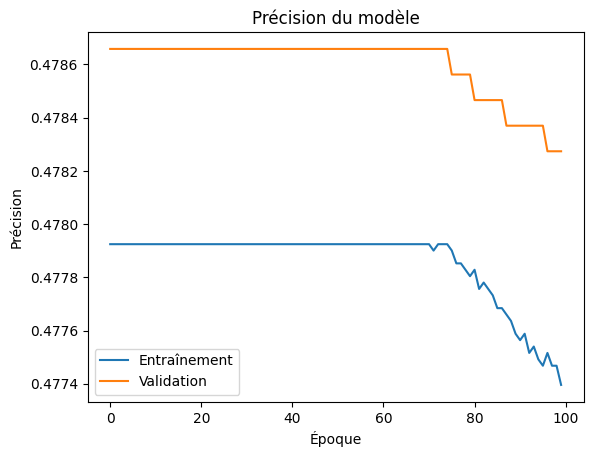

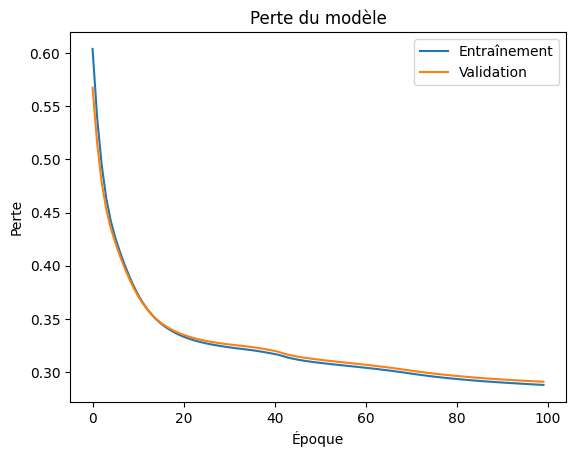

326/326 [==============================] - 0s 366us/step


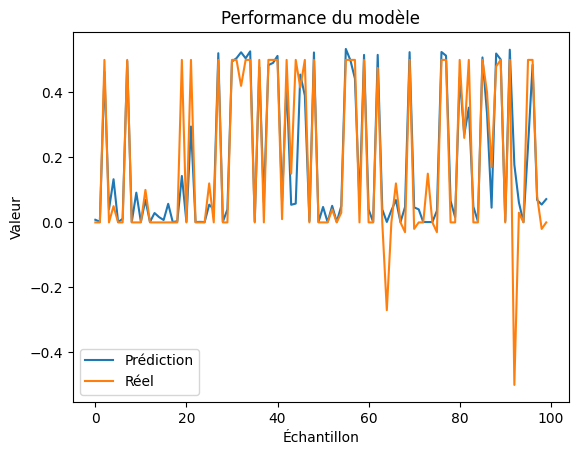

In [120]:
import matplotlib.pyplot as plt 
# plot
accuracy = history.history['accuracy']
loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Tracer la précision
plt.plot(accuracy, label='Entraînement')
plt.plot(val_accuracy, label='Validation')
plt.title('Précision du modèle')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.legend()
plt.show()

# Tracer la perte
plt.plot(loss, label='Entraînement')
plt.plot(val_loss, label='Validation')
plt.title('Perte du modèle')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend()
plt.show()
# Tracer la performance du modèle

# Évaluer le modèle
yres = model.predict(X_test)
plt.plot(yres[0:100], label='Prédiction')
plt.plot(y_test[0:100], label='Réel')
plt.title('Performance du modèle')
plt.xlabel('Échantillon')
plt.ylabel('Valeur')
plt.legend()
plt.show()